In [48]:
# Random forests is an ensemble learning method that uses multiple algorithms to obtain better predictive perfomance
# random forests make multiple decision trees that are each independent and random
# each forest makes its own prediction, and the average of the average of the trees is used (regression) or the most commonly predicted (classification)

import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

car_data =pd.read_csv('/Users/judygitahi/Code/upgraded-potato/3-Randomforest/car_evaluation.csv')
car_data.shape

(1727, 7)

In [49]:
car_data.head

<bound method NDFrame.head of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]>

In [50]:
columns =['buying price', 'maintenance cost', 'doors', 'persons','lug boot', 'safety', 'decision']
car_data.columns = columns
car_data.head

<bound method NDFrame.head of      buying price maintenance cost  doors persons lug boot safety decision
0           vhigh            vhigh      2       2    small    med    unacc
1           vhigh            vhigh      2       2    small   high    unacc
2           vhigh            vhigh      2       2      med    low    unacc
3           vhigh            vhigh      2       2      med    med    unacc
4           vhigh            vhigh      2       2      med   high    unacc
...           ...              ...    ...     ...      ...    ...      ...
1722          low              low  5more    more      med    med     good
1723          low              low  5more    more      med   high    vgood
1724          low              low  5more    more      big    low    unacc
1725          low              low  5more    more      big    med     good
1726          low              low  5more    more      big   high    vgood

[1727 rows x 7 columns]>

In [51]:
car_data.info

<bound method DataFrame.info of      buying price maintenance cost  doors persons lug boot safety decision
0           vhigh            vhigh      2       2    small    med    unacc
1           vhigh            vhigh      2       2    small   high    unacc
2           vhigh            vhigh      2       2      med    low    unacc
3           vhigh            vhigh      2       2      med    med    unacc
4           vhigh            vhigh      2       2      med   high    unacc
...           ...              ...    ...     ...      ...    ...      ...
1722          low              low  5more    more      med    med     good
1723          low              low  5more    more      med   high    vgood
1724          low              low  5more    more      big    low    unacc
1725          low              low  5more    more      big    med     good
1726          low              low  5more    more      big   high    vgood

[1727 rows x 7 columns]>

In [52]:

print([car_data[col].value_counts() for col in columns])  

[high     432
med      432
low      432
vhigh    431
Name: buying price, dtype: int64, high     432
med      432
low      432
vhigh    431
Name: maintenance cost, dtype: int64, 3        432
4        432
5more    432
2        431
Name: doors, dtype: int64, 4       576
more    576
2       575
Name: persons, dtype: int64, med      576
big      576
small    575
Name: lug boot, dtype: int64, med     576
high    576
low     575
Name: safety, dtype: int64, unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64]


In [53]:
car_data.isnull().sum()

buying price        0
maintenance cost    0
doors               0
persons             0
lug boot            0
safety              0
decision            0
dtype: int64

decision is the y variable, and we check and see that values are ordinal

In [54]:
car_data['decision'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [55]:
X = car_data.drop(['decision'], axis=1)

In [56]:
y = car_data['decision']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [58]:
X_train.shape, X_test.shape

((1295, 6), (432, 6))

Since we have a bunch of categorical variables that are ordinal (they have a particular order), we need to encode them

In [59]:
encoder = ce.OrdinalEncoder(cols=['buying price', 'maintenance cost', 'doors', 'persons','lug boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


/Users/judygitahi/Library/Python/3.8/lib/python/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [60]:
X_train.head

<bound method NDFrame.head of       buying price  maintenance cost  doors  persons  lug boot  safety
153              1                 1      1        1         1       1
1407             2                 1      2        2         2       1
1488             2                 1      3        2         2       1
641              3                 1      3        1         2       2
1534             2                 2      2        1         2       3
...            ...               ...    ...      ...       ...     ...
132              1                 1      2        1         3       1
1313             2                 3      2        1         1       2
109              1                 1      2        2         1       3
1504             2                 1      3        1         1       3
1712             2                 4      3        3         2       2

[1295 rows x 6 columns]>

In [61]:
X_test.head

<bound method NDFrame.head of       buying price  maintenance cost  doors  persons  lug boot  safety
233              1                 2      2        1         1       2
58               1                 3      4        2         2       3
772              3                 4      2        3         3       3
16               1                 3      2        3         3       3
1533             2                 2      2        1         2       1
...            ...               ...    ...      ...       ...     ...
820              3                 4      4        3         1       3
761              3                 4      2        2         3       2
812              3                 4      4        2         2       2
880              4                 3      2        3         3       3
1661             2                 4      1        3         3       2

[432 rows x 6 columns]>

In [62]:
classifier = RandomForestClassifier(random_state=0, n_estimators= 100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8889


In [63]:

feature_scores = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety              0.248963
persons             0.238385
buying price        0.179551
maintenance cost    0.159009
doors               0.088288
lug boot            0.085804
dtype: float64

the most important feature was safety, lug boot and doors were the least important

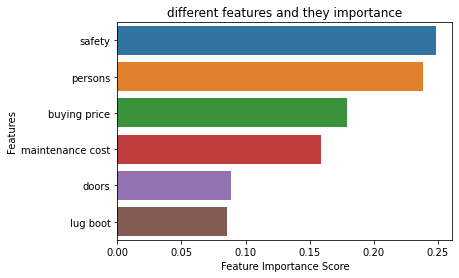

In [64]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("different features and they importance")
plt.show()

In [65]:

X = X.drop(['doors', 'lug boot'], axis=1)


drop the two least important features and redo the classification

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)
encoder = ce.OrdinalEncoder(cols=['buying price', 'maintenance cost', 'persons', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/Users/judygitahi/Library/Python/3.8/lib/python/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [67]:
classifier = RandomForestClassifier(random_state=0, n_estimators = 100)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print('accuracy score with doors and lug boot variables removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


accuracy score with doors and lug boot variables removed : 0.8634


removing the two variables reduces the accuracy of the model so maybe not a great idea

In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 75   6  10   3]
 [  3   3   0   8]
 [ 21   2 285   2]
 [  1   3   0  10]]


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.75      0.80      0.77        94
        good       0.21      0.21      0.21        14
       unacc       0.97      0.92      0.94       310
       vgood       0.43      0.71      0.54        14

    accuracy                           0.86       432
   macro avg       0.59      0.66      0.62       432
weighted avg       0.88      0.86      0.87       432

